In [1]:
import pandas as pd

# Load the dataset
file_path = 'customer_feedback.csv'  # update the path if needed
df = pd.read_csv(file_path)

# Display the first few rows to review the features
df.head()


,Customer ID,Rating,Comment,Category,Date,Product ID,Purchase Amount,Location,Feedback Source,Response Time (hrs)
0,CUST-0001,4.0,Central reduce available share central get rea...,Pricing,03/05/2024,PROD-510,NaN,South Teresaland,In-Store Review,70.55
1,CUST-0002,5.0,Defense consider catch personal.,Delivery,30/03/2024,PROD-748,267.99,North Markshire,Email,13.45
2,CUST-0003,3.0,Sometimes state sit the.,Product Quality,21/06/2024,PROD-417,145.20,Mullenmouth,In-Store Review,2.22
3,CUST-0004,5.0,Director fish condition partner on them Mr suf...,Pricing,02/07/2024,PROD-776,498.20,New Laura,Online Survey,55.20
4,CUST-0005,NaN,Identify window expect movement create night m...,Pricing,14/05/2024,PROD-324,483.40,East Gary,In-Store Review,58.29


In [2]:
# Check for missing values
missing_values = df.isnull().sum()

# Handle missing values (e.g., fill with appropriate value or drop rows)
df = df.dropna()

# Remove duplicates
df = df.drop_duplicates()

# Display the shape of the cleaned dataset
df.shape


(92, 10)

In [3]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Ensure stopwords are downloaded
import nltk
nltk.download('stopwords')
nltk.download('punkt')

# Define a function to clean text
def clean_text(text):
    # Remove special characters and numbers
    text = re.sub(r'[^A-Za-z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Tokenize and remove stopwords
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    # Join tokens back into a single string
    cleaned_text = ' '.join(tokens)
    return cleaned_text

# Apply the clean_text function to the 'Comment' column
df['Cleaned Comment'] = df['Comment'].apply(clean_text)

# Display the cleaned comments
df[['Comment', 'Cleaned Comment']].head()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Computer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Computer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,Comment,Cleaned Comment
1,Defense consider catch personal.,defense consider catch personal
2,Sometimes state sit the.,sometimes state sit
3,Director fish condition partner on them Mr suf...,director fish condition partner mr suffer stil...
6,Same from factor election.,factor election
7,Already old suddenly skill career series.,already old suddenly skill career series


In [4]:
from textblob import TextBlob

# Define a function to classify sentiment
def classify_sentiment(text):
    analysis = TextBlob(text)
    # Set sentiment based on polarity
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment classification to the cleaned comments
df['Sentiment'] = df['Cleaned Comment'].apply(classify_sentiment)

# Display the sentiment distribution
df['Sentiment'].value_counts()


Sentiment
Neutral     38
Positive    37
Negative    17
Name: count, dtype: int64

In [5]:
# Group by Category and calculate average satisfaction (rating)
category_satisfaction = df.groupby('Category')['Rating'].mean().reset_index()

# Display satisfaction scores by category
category_satisfaction


,Category,Rating
0,Customer Service,2.888889
1,Delivery,3.178571
2,Pricing,2.904762
3,Product Quality,2.920000


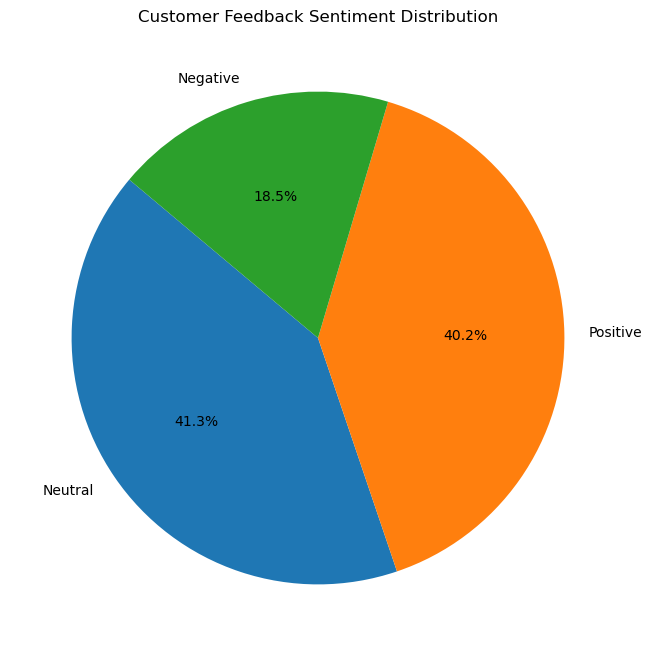

In [6]:
import matplotlib.pyplot as plt

# Pie chart for sentiment distribution
sentiment_counts = df['Sentiment'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Customer Feedback Sentiment Distribution')
plt.show()


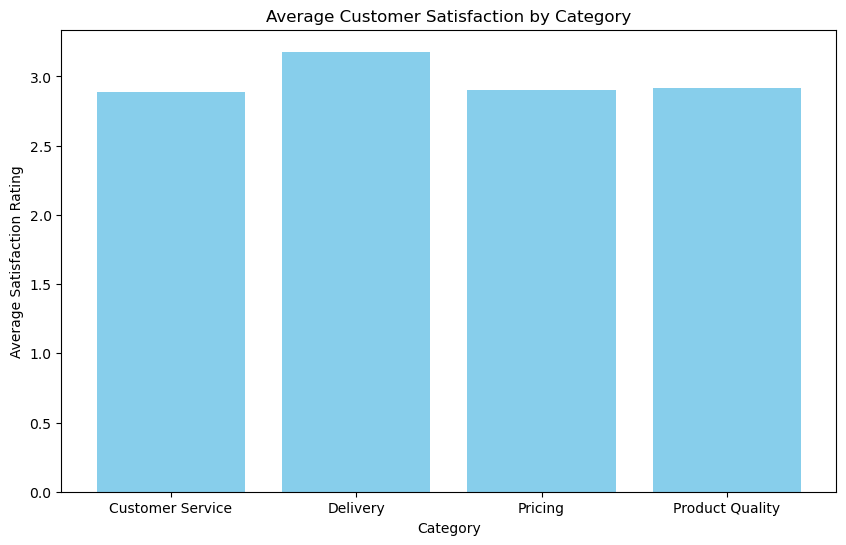

In [7]:
# Bar chart for average satisfaction by category
plt.figure(figsize=(10, 6))
plt.bar(category_satisfaction['Category'], category_satisfaction['Rating'], color='skyblue')
plt.xlabel('Category')
plt.ylabel('Average Satisfaction Rating')
plt.title('Average Customer Satisfaction by Category')
plt.show()


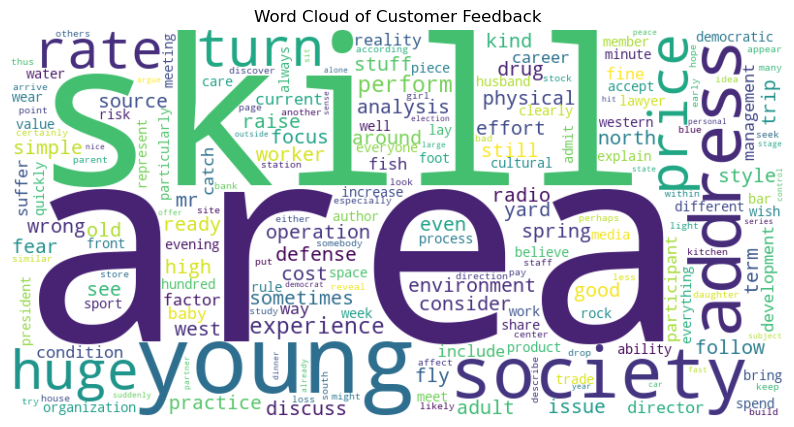

In [8]:
from wordcloud import WordCloud

# Combine all comments into a single string
all_comments = ' '.join(df['Cleaned Comment'])

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_comments)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Customer Feedback')
plt.show()
